In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

# define the number of bins and the number of data.
numBin = 1000
numData = 500000

# define the number of MCS for equilibrium.
skiprows = 2000

# read data from files
file = open('C:/Users/Aojie/Desktop//Data2/L20_1.1227_1.dat', 'r')
lines = file.readlines()[skiprows:]

# 'data' stores the values of total energy or order parameter.
# 'x' stores values of midpoints of bins into which the data are divided.
data = []
x = []

# stores values into 'data'
for line in lines:
    data.append(float(line.split('\t')[1]) )
    
# define size of bins. leftend & rightend are values of both ends of bins.
binsize = (max(data)-min(data))/numBin
leftend = min(data)
rightend = leftend + binsize

# create a list for histogram
hist = [0]*(numBin + 1)


# iterate over each bin and increase the entry in 
# the histogram by 1 for each data 
# found to be in that bin
index = 1
while leftend < max(data) and index <= numBin:
    for i in data:
        if leftend <= i <= rightend:
            hist[index] += 1
    index += 1
    x.append( (leftend + rightend)/2 )
    leftend = rightend
    rightend += binsize
hist.remove(hist[0])

<function matplotlib.pyplot.show(close=None, block=None)>

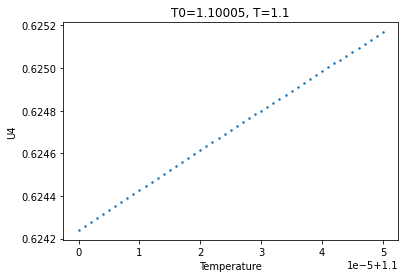

In [4]:
# T is the temperature. 
# T0 and Tf are the initial and final temperatures.
L = 20
T0 = 1.100050
T = 1.100050
Tf = 1.1
dT = 0.000001
temperature = []

# create a list for values of fourth-order cumulant
U4 = []

# calculate the probability distribution and fourth-order
# cumulant at each temperature
while T >= Tf:
    
    # calculate dk for each temperature.
    dk = (1/T0 - 1/T)
    histcopy = hist.copy()
    
    # calculate the denominator in Eq. 7.16 in A Guide to Monte Carlo Simulation
    i = 0
    N = 0
    while i <= numBin-1:
        N += histcopy[i]*(np.exp(dk*x[i]) )
        i += 1
    
    # calculate the numerator in the same equation
    i = 0
    while i <= numBin-1:
        histcopy[i] = histcopy[i]*( np.exp(dk*x[i]) )
        i += 1
        
    histcopy = np.array(histcopy)
    
    # p is probability distribution
    p = histcopy/N

    # calculate values of numerator and denominator in Eq. 4.12
    i = 0
    E4 = 0
    E2 = 0
    while i < numBin:
        # calculate the average using probability
        # according to Eq. 7.17
        E4 += ( ( (x[i]/L**3)**4)*p[i] )
        E2 += ( ( (x[i]/L**3)**2)*p[i] )
        i += 1
    
    # calculate the fourth-order cumulant.
    u4 = 1 - E4/(3*(E2**2))
    
    temperature.append(T)
    U4.append(u4)
    T -= dT
    
plt.plot(temperature, U4,'o', markersize=1.5)
plt.ylabel('U4')
plt.xlabel('Temperature')
plt.title('Fourth order Cumulant for Order Parameter')
plt.show